Netflix Kaggle Exploratory Data Analysis

Dataset - https://www.kaggle.com/shivamb/netflix-shows

By Haider Rizvi 


In [3]:
# Importing Libraries and Dataset

In [73]:
import pandas as pd
import os
import plotly.express as px

In [74]:
# use os.chdir to change the current directory
os.getcwd()
os.chdir("/content/drive/MyDrive/Collab Data Files/Netlix_EDA")
os.getcwd()

'/content/drive/MyDrive/Collab Data Files/Netlix_EDA'

In [75]:
data_import = pd.read_csv("netflix_titles.csv")

In [76]:
# converting date_added column to time format
data_import['date_added']= pd.to_datetime(data_import["date_added"].str.strip(), format="%B %d, %Y")
# .str.strip as there was a space before date causing error


In [77]:
data_import.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Ma...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Action & Adventure","To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down among the incarcerated women at the Orleans Justice Center in New Orleans on this gritty reality series."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV Comedies","In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life."


##HIGH LEVEL EDA

In [78]:
# Exploring data types
data_import.dtypes
# Dates should be imported as Date format not String


show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

### Describing the Numerical column in data


In [79]:
data_import.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


##Histogram of Release Date of films

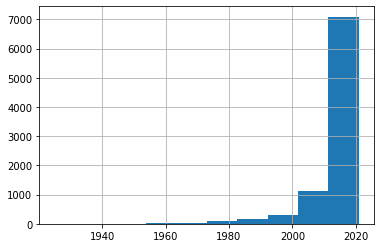

In [80]:
data_import['release_year'].hist()

In [81]:
## plotly offers much better graphs than matplotlib
px.histogram(data_import, x='release_year')

In [59]:
# Looking for the oldest film
data_import[data_import["release_year"] == 1925]["description"]

4250    This collection restores films from women who tackled hot-button issues, transcended norms, and left a mark on the history of cinema and the industry.
Name: description, dtype: object

In [54]:
data_import.iloc[4250]

show_id                                                     s4251
type                                                      TV Show
title                           Pioneers: First Women Filmmakers*
director                                                      NaN
cast                                                          NaN
country                                                       NaN
date_added                                    2018-12-30 00:00:00
release_year                                                 1925
rating                                                      TV-14
duration                                                 1 Season
listed_in                                                TV Shows
description     This collection restores films from women who ...
Name: 4250, dtype: object

In [60]:
## to display full text while printing dataframe
pd.options.display.max_colwidth = 200

In [82]:
data_import.iloc[4250]

show_id                                                                                                                                                          s4251
type                                                                                                                                                           TV Show
title                                                                                                                                Pioneers: First Women Filmmakers*
director                                                                                                                                                           NaN
cast                                                                                                                                                               NaN
country                                                                                                                                                            Na

##When did Netflix added the films to its collection

In [83]:
px.histogram(data_import,"date_added")

##Extract Month from date Added

In [87]:
data_import['month_added']= data_import['date_added'].dt.month.fillna(0)
# fillna fills all the empty cell in the new coloumn with NA . 
# it is very important to not to have any empy cells in data . use fillna(o)

In [88]:
px.histogram(data_import, x="date_added", color="month_added")

# In which month Netflix likes to bring most movies

In [93]:
px.histogram(data_import, x="month_added", color='type')

from the above histogram we can see that it is almost same for all the months

## On what day Netflix upload most of the content

In [90]:
data_import['day_added'] = data_import['date_added'].dt.day.fillna(0)

In [92]:
# Histogram will show on which day most content is uploaded
px.histogram(data_import, x="day_added",color ='type')

The above histogram shows that netflix adds the movies on the first day of the month

##STRING COLUMN ANALYSIS

In [94]:
data_import.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month_added', 'day_added'],
      dtype='object')

In [96]:
data_import['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [97]:
px.histogram(data_import, x='rating', color='type')